In [ ]:
#importing the required libraries to build logistic regresion model

In [93]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics


In [94]:
#Importing the file

In [95]:
d_check= pd.read_excel('/Users/sivamugunthanashok/Desktop/MAJORS/PA/diabetes check.xlsx')
d_check.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [96]:
#Checking the total rows and columns

In [97]:
d_check.shape

(768, 9)

In [98]:
#General information about the dataset(d_check)

In [99]:
d_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [100]:
d_check.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Correlation Matrix:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
diabetes                     0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose              

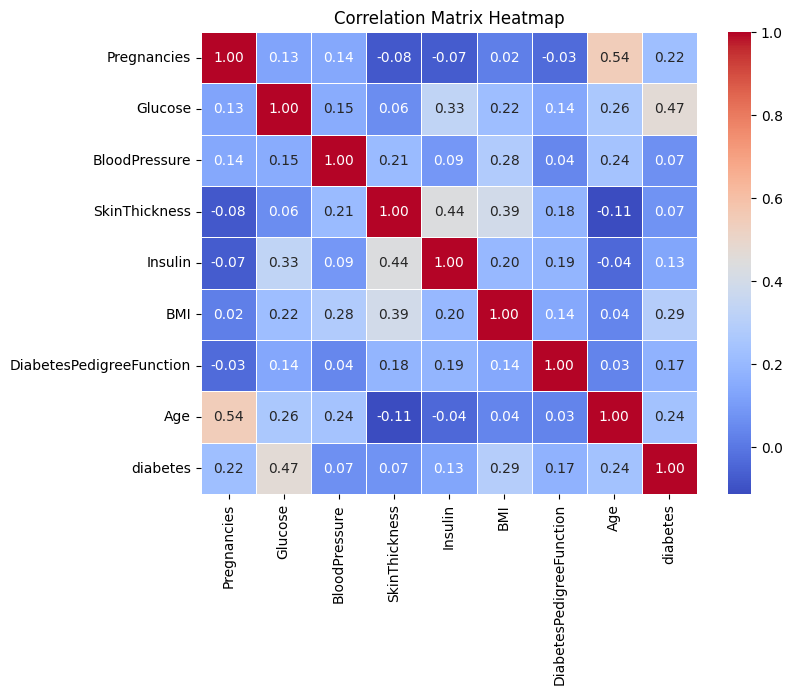

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Display the correlation matrix
correlation_matrix = d_check.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Optional: Plot a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [101]:
#Renaming the column name(outcome) to (diabetes)

In [102]:
d_check = d_check.rename(columns={'Outcome': 'diabetes'})

In [103]:
#To check the count occurrences of each unique value in the 'diabetes' column

In [104]:
d_check.diabetes.value_counts()

diabetes
0    500
1    268
Name: count, dtype: int64

In [105]:
#Defining explantory variables 

In [106]:
x_features=list(d_check.columns)
x_features.remove('diabetes')
x_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [107]:
#defining explantory(X) and outcome variable(Y),Adding constant to explantory variable(X) get (Bo)

In [108]:
Y=d_check.diabetes
X = sm.add_constant(d_check[x_features])

In [109]:
# Initialize the logistic regression model with outcome (Y) and explanatory (X) variables
# Fit the logistic regression model to the data
# Display a detailed summary of the logistic regression results

In [110]:
logit=sm.Logit(Y,X)
logit_model=logit.fit()
logit_model.summary2()

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                  Logit              Method:             MLE       
Dependent Variable:     diabetes           Pseudo R-squared:   0.272     
Date:                   2025-04-11 19:02   AIC:                741.4454  
No. Observations:       768                BIC:                783.2395  
Df Model:               8                  Log-Likelihood:     -361.72   
Df Residuals:           759                LL-Null:            -496.74   
Converged:              1.0000             LLR p-value:        9.6516e-54
No. Iterations:         6.0000             Scale:              1.0000    
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
const                    -8.4047   0.7166 -11.7280 0.0000 -9.8093 -7.0001
Pregnancies               0.1232   0.0321   3.8401 0.0001  0.0603  0.1861
Glucose                   0.0352   0.0037   9.4814 0.0000  0.0279  0.0424
BloodPressure            -0.0133   0.0052  -2.5404 0.0111 -0.0236 -0.0030
SkinThickness             0.0006   0.0069   0.0897 0.9285 -0.0129  0.0141
Insulin                  -0.0012   0.0009  -1.3223 0.1861 -0.0030  0.0006
BMI                       0.0897   0.0151   5.9453 0.0000  0.0601  0.1193
DiabetesPedigreeFunction  0.9452   0.2991   3.1596 0.0016  0.3589  1.5315
Age                       0.0149   0.0093   1.5929 0.1112 -0.0034  0.0332
=========================================================================

"""

In [111]:
def get_significant_vars(lm):
    # Step 1: Convert p-values into a table (DataFrame)
    var_p_vals_df = pd.DataFrame(lm.pvalues)
    
    # Step 2: Add variable names as a column in the table
    var_p_vals_df['vars'] = var_p_vals_df.index

    # Step 3: Rename the columns to 'pvals' (for p-values) and 'vars' (for variable names)
    var_p_vals_df.columns = ['pvals', 'vars']

    # Step 4: Find the variables where p-value <= 0.05 and return their names as a list
    return list(var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'])


In [112]:
#Printing the significant variables

In [113]:
significant_vars=get_significant_vars(logit_model)
significant_vars

['const',
 'Pregnancies',
 'Glucose',
 'BloodPressure',
 'BMI',
 'DiabetesPedigreeFunction']

In [114]:
# Fit a logistic regression model using significant variables and adding constant to the (X) explanatory variable

In [115]:
final_logit=sm.Logit(Y,sm.add_constant(X[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.474323
         Iterations 6


In [116]:
#Final summary of the model (With only significant variables)
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                  Logit              Method:             MLE       
Dependent Variable:     diabetes           Pseudo R-squared:   0.267     
Date:                   2025-04-11 19:02   AIC:                740.5596  
No. Observations:       768                BIC:                768.4223  
Df Model:               5                  Log-Likelihood:     -364.28   
Df Residuals:           762                LL-Null:            -496.74   
Converged:              1.0000             LLR p-value:        3.4421e-55
No. Iterations:         6.0000             Scale:              1.0000    
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
const                    -7.9550   0.6758 -11.7708 0.0000 -9.2795 -6.6304
Pregnancies               0.1535   0.0278   5.5143 0.0000  0.0989  0.2080
Glucose                   0.0347   0.0034  10.2130 0.0000  0.0280  0.0413
BloodPressure            -0.0120   0.0050  -2.3868 0.0170 -0.0219 -0.0021
BMI                       0.0848   0.0141   6.0059 0.0000  0.0571  0.1125
DiabetesPedigreeFunction  0.9106   0.2940   3.0971 0.0020  0.3343  1.4869
=========================================================================

"""

In [117]:
#Printing actual value vs predicted value for the significant variables from the final summary
Y_pred=pd.DataFrame({'actual':Y,
                     'predicted_prob':final_logit.predict(
                         sm.add_constant(X[significant_vars]))})

In [118]:
# Sample 10 random predictions from the predicted values, ensuring the same random sample every time by setting random_state to 7
Y_pred.sample(10,random_state=7)

,actual,predicted_prob
353,0,0.069714
236,1,0.876866
323,1,0.762600
98,0,0.160798
701,1,0.313795
61,1,0.513703
600,0,0.079305
242,1,0.312677
744,0,0.942662
644,0,0.143922


In [119]:
# Create a new column 'predicted' in Y_pred DataFrame by converting predicted probabilities to binary outcomes
# If the predicted probability is greater than 0.5, assign 1 (positive class), otherwise assign 0 (negative class)
Y_pred['predicted']=Y_pred.predicted_prob.map(
    lambda x:1 if x>0.5 else 0)
Y_pred.sample(10, random_state=7)

,actual,predicted_prob,predicted
353,0,0.069714,0
236,1,0.876866,1
323,1,0.762600,1
98,0,0.160798,0
701,1,0.313795,0
61,1,0.513703,1
600,0,0.079305,0
242,1,0.312677,0
744,0,0.942662,1
644,0,0.143922,0


In [138]:
# Define a function to draw the confusion matrix
def draw_cm(actual, predicted):
     # Generate the confusion matrix using actual and predicted labels
    cm= metrics.confusion_matrix(actual,predicted, labels=[0,1])
    # Use seaborn's heatmap to visualize the confusion matrix
    sn.heatmap(cm,annot=True,fmt='.2f',
               xticklabels=['Negative','Positive'],
               yticklabels=['Negative','Positive'])
     # Set the labels for the axes
    plt.ylabel('True lable')
    plt.xlabel('predicted label')
      # Display the plot
    plt.show()

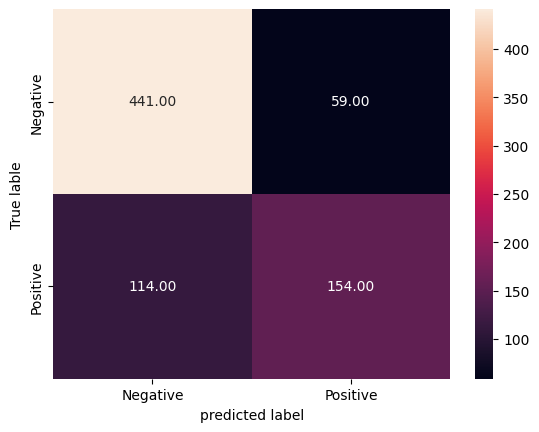

'\nInterpretation \nTrue Positive (Top-Left): 436 instances were correctly predicted as "Not Subscribed."\nFalse Positive (Top-Right): 64 instances were incorrectly predicted as "Subscribed" when they were actually "Not Subscribed."\nFalse Negative (Bottom-Left): 113 instances were incorrectly predicted as "Not Subscribed" when they were actually "Subscribed."\nTrue Negative (Bottom-Right): 155 instances were correctly predicted as "Subscribed."\n'

In [139]:
# Call the draw_cm function to visualize the confusion matrix using the 'actual' and 'predicted' columns from the Y_pred DataFrame
draw_cm(Y_pred['actual'],Y_pred['predicted'])

"""
Interpretation 
True Positive (Top-Left): 436 instances were correctly predicted as "negative."
False Positive (Top-Right): 64 instances were incorrectly predicted as "positive" when they were actually "negative."
False Negative (Bottom-Left): 113 instances were incorrectly predicted as "Negative" when they were actually "positive"
True Negative (Bottom-Right): 155 instances were correctly predicted as "positive"
"""

In [122]:
# Print the classification report using actual and predicted labels from the Y_pred DataFrame
print(metrics.classification_report(Y_pred.actual, Y_pred.predicted))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       500
           1       0.72      0.57      0.64       268

    accuracy                           0.77       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.77      0.77       768



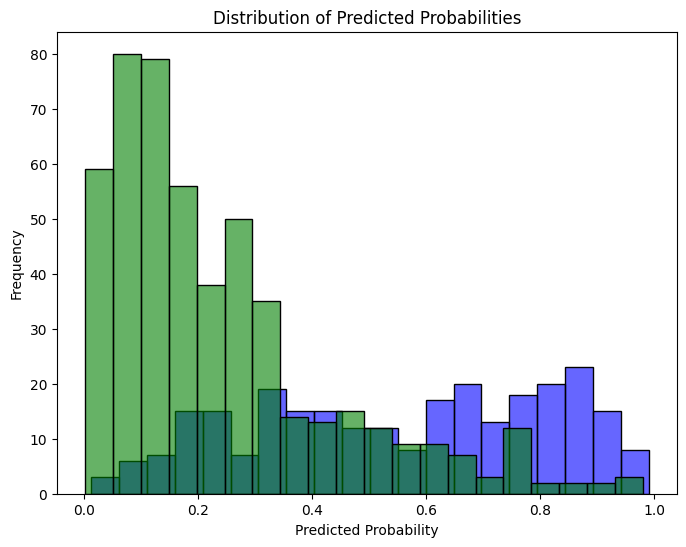

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

#Set figure size
plt.figure(figsize=(8, 6))

#Plot distribution of predicted probabilities for Bad Credit
sns.histplot(Y_pred[Y_pred.actual == 1]["predicted_prob"], bins=20, color="b", label="Bad Credit", alpha=0.6)

#Plot distribution of predicted probabilities for Good Credit
sns.histplot(Y_pred[Y_pred.actual == 0]["predicted_prob"], bins=20, color="g", label="Good Credit", alpha=0.6)

# Adding Legend plt.legend()

#Adding labels and title
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Probabilities")

# Display plot
plt.show()

### (ROC)Reciver operator curve (AUC)Area under the curve

In [124]:
import matplotlib.pyplot as plt
from sklearn import metrics

In [125]:
def draw_roc(actual, predicted_prob):
    # Obtain fpr, tpr, thresholds
    fpr, tpr, thresholds = metrics.roc_curve(actual, predicted_prob, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, predicted_prob)
    
    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % auc_score)
    
    # Draw a diagonal line (random classifier line)
    plt.plot([0, 1], [0, 1], "k--")
    
    # Set axis limits
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    # Add labels and legend
    plt.xlabel("False Positive Rate (1 - Specificity)")
    plt.ylabel("True Positive Rate (Sensitivity)")
    plt.legend(loc="lower right")
    
    # Show the plot
    plt.show()
    
    # Return fpr, tpr, thresholds
    return fpr, tpr, thresholds


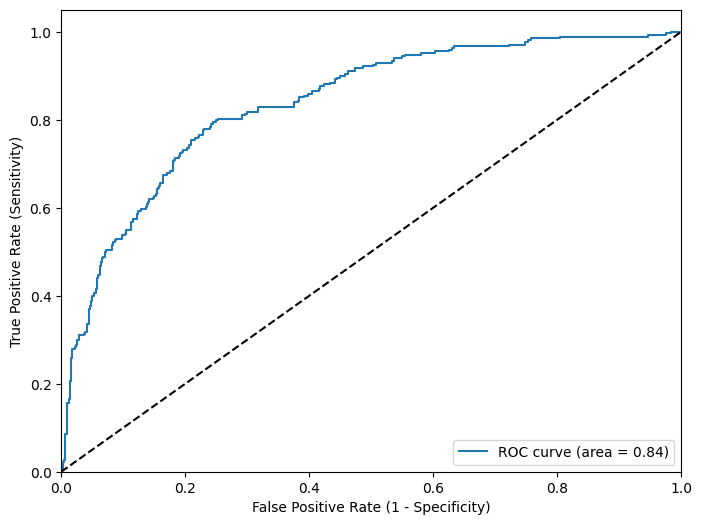

In [126]:
fpr, tpr, thresholds = draw_roc(Y_pred.actual, Y_pred.predicted_prob)

In [127]:
auc_score = metrics.roc_auc_score(Y_pred.actual, Y_pred.predicted_prob)
round(float(auc_score),2)

0.84

### Youndens index:

In [128]:
tpr_fpr=pd.DataFrame({"tpr":tpr,"fpr":fpr,"thresholds":thresholds})
tpr_fpr["diff"]=tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values("diff",ascending=False)[0:5]

,tpr,fpr,thresholds,diff
335,0.794776,0.244,0.319596,0.550776
341,0.802239,0.252,0.312677,0.550239
324,0.779851,0.230,0.328583,0.549851
333,0.791045,0.242,0.321644,0.549045
336,0.794776,0.246,0.318831,0.548776


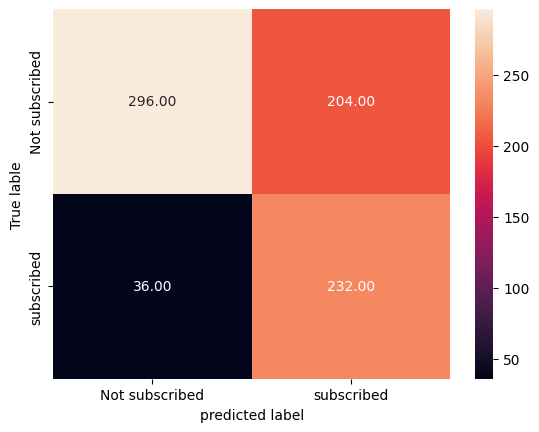

In [129]:
Y_pred["predicted_new"] = Y_pred.predicted_prob.map(lambda x: 1 if x>0.22 else 0)
draw_cm(Y_pred.actual, Y_pred.predicted_new)

In [130]:
print(metrics.classification_report(Y_pred.actual, Y_pred.predicted_new))

              precision    recall  f1-score   support

           0       0.89      0.59      0.71       500
           1       0.53      0.87      0.66       268

    accuracy                           0.69       768
   macro avg       0.71      0.73      0.69       768
weighted avg       0.77      0.69      0.69       768

